# **Aulas 8 e 9: Aprendizado não Supervisionado**



# Setup

Pacotes necessários para a configuração:
- MatplotLib;
- Python 3.5 ou superior;
- Scikit-Learn 0.20 ou superior;
- Numpy;
- os;

In [6]:
# Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 
import sklearn
assert sklearn.__version__ >= "0.20"

# Import numpy e os
import numpy as np
import os

# Tornar a saída desse notebook estável em todas as execuções
# Geração de números pseudo-aleatórios
np.random.seed(42)

# Configurações para as figuras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Configuração de pasta para salvar as figuras
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning" # Nome da pasta
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) #Configurando o Path
os.makedirs(IMAGES_PATH, exist_ok=True)

#Função para salvar figura
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Clustering

Agrupamento é a tarefa de identificar instâncias semelhantes e atribuí-las a clusters, ou grupos de instâncias semelhantes. O presente notebook contém exemplos das principais técnicas de agrupamento.

## K-Means

**Principais características:**
- Técnica relativamente simples de aprendizado não supervisionado;
- Agrupamento particional;
- Objetivo: encontrar K centróides que melhor separam o conjunto de dados.
    - K é o número de grupos desejados;
    - K é um parâmetro que deve ser especificado.

Para começar, vamos utilizar o dataset make_blobs do Scikit-Learn, esse dataset possibilita a definição de um número **n** de agrupamentos para utilizarmos nos testes dos algoritmos.

In [7]:
from sklearn.datasets import make_blobs

Definição da posição dos blobs.

In [8]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [9]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Agora vamos exibir: 

In [10]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


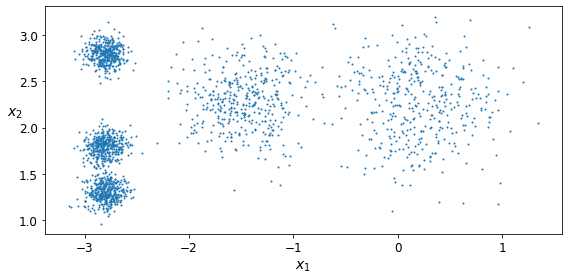

In [11]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

**Treinamento e predição**

Agora vamos treinar o K-Means com esse conjunto de dados. Ele tentará encontrar o centro de cada **blob** e atribuir cada instância ao **blob** mais próximo.

In [12]:
from sklearn.cluster import KMeans

In [13]:
k = 5 # Já sabemos a quantidade de blobs, logo fica fácil definir o número de centróides.
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Cada instância foi atribuída a um dos 5 clusters:

In [14]:
y_pred

array([0, 4, 1, ..., 2, 1, 4])

In [15]:
y_pred is kmeans.labels_

True

Estimando os 5 centroídes (ou seja, centros de cluster):

In [16]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

Observe que a instância `KMeans` preserva os rótulos das instâncias nas quais foi treinada. Um tanto confuso, neste contexto, o _label_ de uma instância é o índice do cluster ao qual a instância é atribuída:

In [17]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4])

Prevendo rótulos de novas instâncias:

In [18]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

#### **Limites de Decisão**

É possível observar a fronteira de decisão do cluster plotando o diagrama de Voronoi. Esse diagrama vai ser plotado pelo código abaixo:

In [19]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


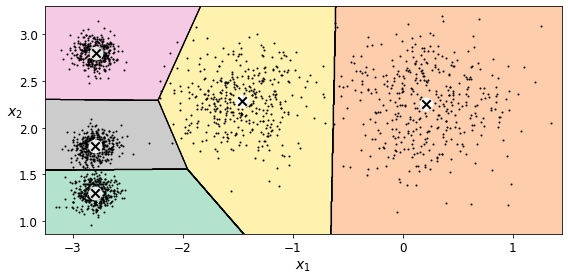

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

Observando o diagrama, é possível observar que algumas das instâncias próximas às bordas foram atribuídas ao cluster errado, mas no geral o resultado parece ser muito bom!

### O Algoritmo K-Means 

O K-Means é um dos algoritmos mais rápidos de clusterização (agrupamento), e também é um dos mais simples:
* Primeiro inicialize $k$ centroídes aleatoriamente: $k$ instâncias distintas são escolhidas aleatoriamente do conjunto de dados e os centróides são colocados em seus locais.
* Repita até a convergência (ou seja, até que os centróides parem de se mover):
     * Atribua cada instância ao centróide mais próximo.
     * Atualize os centróides para serem a média das instâncias atribuídas a eles.

A classe `KMeans` aplica um algoritmo otimizado por padrão. Para obter o algoritmo K-Means original (apenas para fins educacionais), você deve definir `init =" random "`, `n_init = 1` e `algorithm = "full" `. Esses hiperparâmetros serão explicados a seguir:
- `init =" random"`: inicialização aleatória dos centróides;
- `n_init = 1`: define o número de inicializações aleatórias, por padrão é 10. O melhor resoltado será utilizado, as comparações entre as inicializações vão ser em termos de inércia.
- `algorithm = "full" `: Algoritmo clássico, sem as otimizações.

Vamos executar o algoritmo K-Means para 1, 2 e 3 iterações, para ver como os centróides se movem:

In [21]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

Plotando os diferentes kmeans:

Saving figure kmeans_algorithm_plot


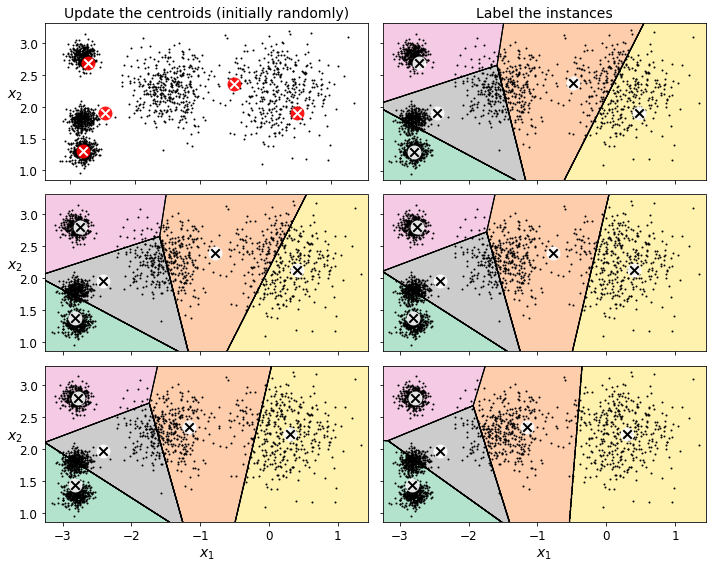

In [22]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

**Variabilidade do K-Means**

No algoritmo K-Means original, os centróides são inicializados aleatoriamente, e o algoritmo simplesmente executa uma única iteração para melhorar gradualmente os centróides, como vimos acima.

No entanto, um grande problema com essa abordagem é que se você executar K-Means várias vezes (ou com diferentes sementes aleatórias), ele pode convergir para soluções muito diferentes, como você pode ver abaixo:

In [23]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure kmeans_variability_plot


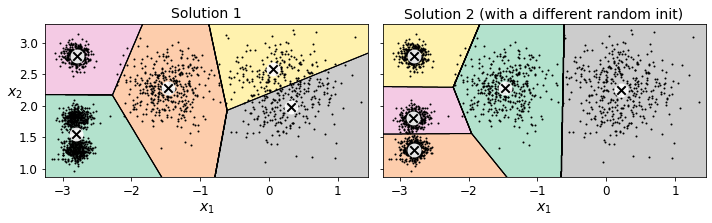

In [24]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

Observações:
- A inicialização do centróide é fundamental para se obter um bom desempenho do algoritmo.
- Caso os centróides não forem iniciados de maneira adequada o algoritmo pode não convergir para a solução.

### Inertia

Para selecionar o melhor modelo, precisaremos avaliar o desempenho de um modelo K-Mean. Infelizmente, o armazenamento em cluster é uma tarefa não supervisionada, então não temos os alvos. Mas pelo menos podemos medir a distância entre cada instância e seu centróide. Esta é a ideia por trás da métrica de inércia:

In [25]:
kmeans.inertia_

211.59853725816828

Como você pode verificar facilmente, a inércia é a soma das distâncias quadradas entre cada instância de treinamento e seu centróide mais próximo:

In [26]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816845

O método `score ()` retorna a inércia negativa. Por que negativo? Bem, é porque o método `score ()` de um preditor deve sempre respeitar a regra "_maior é melhor_".

In [27]:
kmeans.score(X)

-211.59853725816834

### Múltiplas inicializações

Múltiplas inicializações é uma abordagem para resolver o problema de variabilidade, essa abordagem consiste em simplesmente executar o algoritmo K-Means várias vezes com inicializações aleatórias diferentes e selecionar a solução que minimiza a inércia. Por exemplo, aqui estão as inércias dos dois modelos "relativamente ruins" mostrados na figura anterior:

In [28]:
kmeans_rnd_init1.inertia_

219.43539442771402

In [29]:
kmeans_rnd_init2.inertia_

211.5985372581683

Como você pode ver, eles têm uma inércia maior do que o primeiro modelo "relativamente bom" que treinamos, o que significa que provavelmente são piores.

Ao definir o hiperparâmetro `n_init`, o Scikit-Learn executa o algoritmo original` n_init` vezes e seleciona a solução que minimiza a inércia. Por padrão, o Scikit-Learn define `n_init = 10`.

In [30]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

Sendo assim, é possível observar que para obter a melhor solução em termos de inércia utilizando o K-Means é assumindo $ k = 5 $.

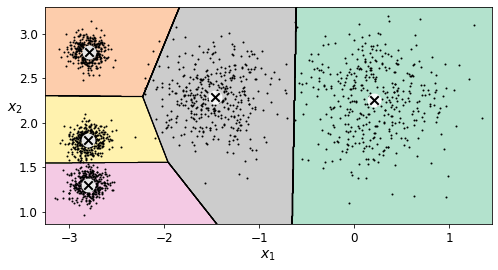

In [31]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### Métodos de Inicialização do Centróide

Existem abordagens melhores que inicializar os centróides aleatoreamente, umas delas é o algoritmo proposto em um [artigo de 2006] (https://goo.gl/eNUPw6) por David Arthur e Sergei Vassilvitskii:
* Pegue um centróide $ c_1 $, escolhido uniformemente ao acaso no conjunto de dados.

* Pegue um novo centro $ c_i $, escolhendo uma instância $ \mathbf {x} _i $ com probabilidade: $ D (\mathbf {x} _i) ^ 2 $ / $ \sum \limits_ {j = 1} ^ {m } {D (\mathbf {x} _j)} ^ 2 $ onde $ D (\mathbf {x} _i) $ é a distância entre a instância $ \mathbf {x} _i $ e o centróide mais próximo que já foi escolhido. Essa distribuição de probabilidade garante que as instâncias mais distantes dos centróides já escolhidos sejam muito mais provavelmente selecionadas como centróides.

* Repita a etapa anterior até que todos os $ k $ centróides tenham sido escolhidos.

In [32]:
KMeans()

KMeans()

In [33]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

Pegando o valor da inércia:

In [34]:
kmeans.inertia_

211.5985372581683

### Encontrando o número ótimo de clusters

E se o número de clusters fosse definido com um valor menor ou maior que 5?

Saving figure bad_n_clusters_plot


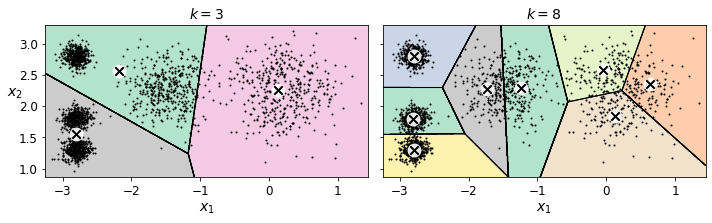

In [35]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

Analisando as figuras é possível afirmar que esses modelos não são tão bons, vamos observar as suas inércias:

In [36]:
kmeans_k3.inertia_

653.2167190021556

In [37]:
kmeans_k8.inertia_

119.11983416102889

O K-Means com o valor de $ k = 8 $ tem a menor inércia, logo parece ser melhor que o K-Means com o valor de $ k = 3 $. No entanto, não podemos simplesmente tomar o valor de $ k $ que minimiza a inércia, pois ele fica cada vez menor à medida que aumentamos $ k $. Esse comportamento ocorre porque quanto mais clusters houver, mais próxima cada instância estará de seu centróide mais próximo e, portanto, menor será a inércia.

Podemos melhorar isso, vamos plotar a inércia em função de $ k $ e analisar a curva resultante:

In [38]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k_plot


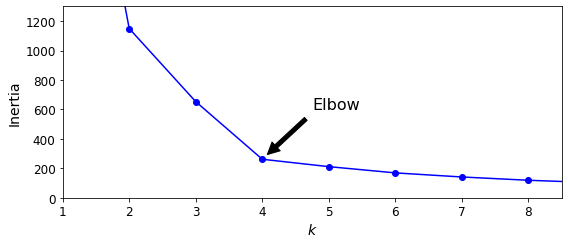

In [39]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

Analisando a figura, é possível observar que há um "cotovelo" em $ k = 4 $, isso siginifica que menos clusters que isso resultaria em um resultado ruim e mais clusters não ajudaria muito... 

Logo, plotar a inércia em função de 𝑘 e analisar a curva resultante é chamado **método do cotovelo**.

Utilizando do **método do cotovelo** podemos afirmar que $ k = 4 $ é uma escolha muito boa. É claro que, neste exemplo, não é perfeito, pois significa que os dois blobs na parte inferior esquerda serão considerados apenas um único cluster, mas mesmo assim é um cluster muito bom.

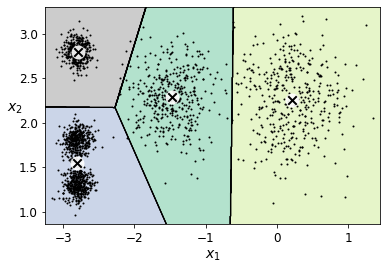

In [40]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Outra abordagem que podemos utilizar é o _Coeficiente de Silhouette_, que é o coeficiente médio de silhouette de todas as instâncias. O coeficiente de silhouette de uma instância é igual a igual a $ (b - a) / \ max (a, b) $, onde $ a $ é a distância média para as outras instâncias no mesmo cluster (é a _distância intracluster média_), e $ b $ é a _distância média do cluster mais próximo_, que é a distância média até as instâncias do próximo cluster mais próximo (definido como aquele que minimiza $ b $, excluindo o próprio cluster da instância).

O coeficiente de silhouette pode variar entre -1 e +1:
- Próximo a 1 significa que a instância está dentro de seu próprio cluster e distante dos outros clusters.
- Próximo a 0 significa que está próximo a uma fronteira do cluster;
- Próximo a -1 significa que a instância pode ter sido atribuída ao cluster errado.

Vamos plotar o _silhouette score_ como uma função de $k$:

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [43]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


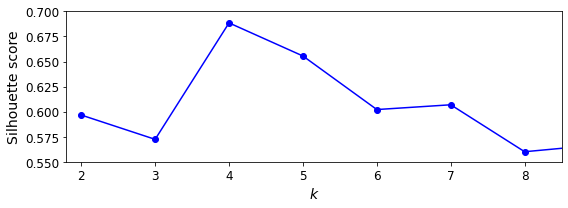

In [44]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

Como você pode ver, esta visualização é muito mais rica do que a anterior: em particular, embora confirme que $ k = 4 $ é uma escolha muito boa, mas também destaca o fato de que $ k = 5 $ também é muito bom .

Uma visualização ainda mais informativa é fornecida quando você plota o coeficiente de silhueta de cada instância, classificado pelo cluster ao qual eles são atribuídos e pelo valor do coeficiente. Isso é chamado de _grama silhueta_:

Saving figure silhouette_analysis_plot


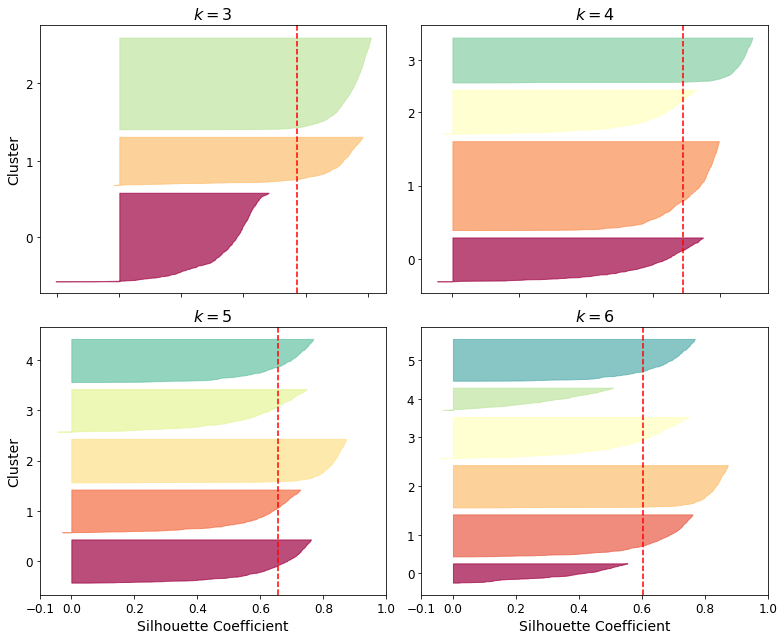

In [45]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

Logo, $ k = 5 $ parece a melhor opção, já que todos os clusters são aproximadamente do mesmo tamanho e todos eles cruzam a linha tracejada, que representa a pontuação média da silhueta.

## Limits of K-Means

O K-Means é rápido e escalonável porém, não é perfeito:
- É necessário rodar o algoritmo várias vezes para evitar soluções abaixo do ideal;
- É necessário especificar o número de clusters (K), o que pode ser um problema;
- O K-Means não sem comporta bem com clusters de tamanho variado, densidades diferentes ou formas esféricas.

In [46]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

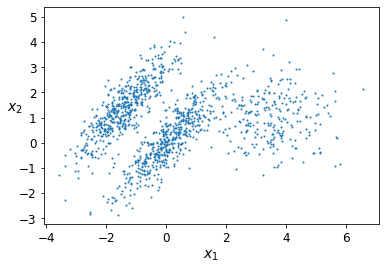

In [47]:
plot_clusters(X)

In [48]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

Saving figure bad_kmeans_plot


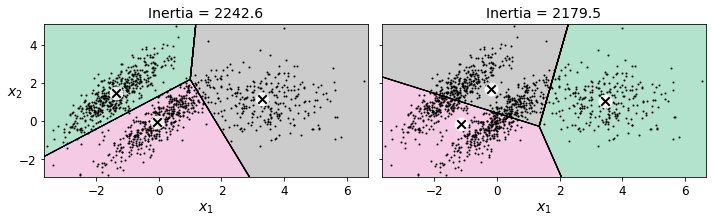

In [49]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

save_fig("bad_kmeans_plot")
plt.show()

## DBSCAN

A classe DBSCAN do Scikit-Learn é bem simples de usar, vamos utilizá-lo em conjunto com o dataset [Moons do Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [50]:
from sklearn.datasets import make_moons

In [51]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [52]:
from sklearn.cluster import DBSCAN

In [53]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

Os rótulos de todas as instâncias agora estão disponíveis na variável da instância _labels_:

In [54]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

Os índices das instâncias core estão disponíveis na variável de instância _core_sample_indices_ e as próprias instância core, na variável de instância _componets_:

In [55]:
len(dbscan.core_sample_indices_)

808

In [56]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [57]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [58]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [59]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

Vamos plotar o gráfico representando essa clusterização.

In [60]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Observando a figura esquerda abaixo é possível observar que foram identificados 7 clusters diferentes, o que não ficou bom. Felizmente podemos ajustar o parâmetro de vizinhaça _eps_ para $ 0,2 $ e obteremos a clusterização da figura da direita:

Saving figure dbscan_plot


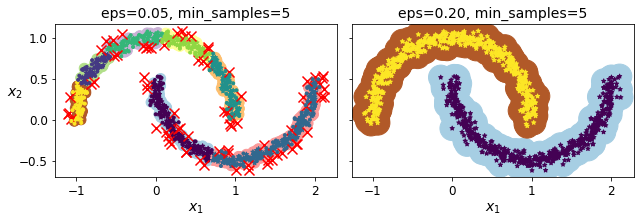

In [61]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()


In [62]:
dbscan = dbscan2

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [65]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [66]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

Saving figure cluster_classification_plot


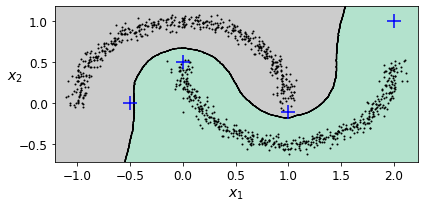

In [67]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

In [68]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

## Other Clustering Algorithms

### Agglomerative Clustering

In [69]:
from sklearn.cluster import AgglomerativeClustering

In [70]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [71]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [72]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [73]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

# Referências

GÉRON, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. O'Reilly Media, 2019.
